# Quetelet - Project 1

### Research Question: Our project is analyzing the demographic and structural shifts in China's economy and population throughout various reform periods in the last 60 years, including the Great Leap Forward, The Reform Period, and the One-Child Policy.

Project Goals: Identify key changes in agriculture, fertility rates, and gdp and population growth during the reform periods.

In [4]:
!pip install pandas numpy matplotlib seaborn wbdata plotly requests

  Using cached wbdata-1.1.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached dateparser-1.3.0-py3-none-any.whl.metadata (30 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached tzlocal-5.3.1-py3-none-any.whl.metadata (7.6 kB)
Using cached wbdata-1.1.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
Using cached dateparser-1.3.0-py3-none-any.whl (318 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Using cached tzlocal-5.3.1-py3-none-any.whl (18 kB)
  Attempting uninstall: cachetools
    Found existing installation: cachetools 6.2.1
    Uninstalling cachetools-6.2.1:
      Successfully uninstalled cach

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import wbdata
import requests
from datetime import datetime

Key '-508560966649700730' not in persistent cache.
Key '270002657502605291' not in persistent cache.
Key '-4035520740736673286' not in persistent cache.
Key '-9091995258669954352' not in persistent cache.
Key '-1192910950269762868' not in persistent cache.
Key '-5572925744122070083' not in persistent cache.
Key '2326158564278121401' not in persistent cache.
Key '-5835228612361773771' not in persistent cache.
Key '-7035839351894438242' not in persistent cache.
Key '-2316159097813889502' not in persistent cache.
Key '-5579219362368096324' not in persistent cache.
Key '3972923485270520955' not in persistent cache.
Key '-4727545257378272680' not in persistent cache.
Key '-5842903145383311027' not in persistent cache.
Key '8822643741689942070' not in persistent cache.
Key '9076881154239268033' not in persistent cache.
Key '-6105030817471725277' not in persistent cache.
Key '1794053490928466207' not in persistent cache.
Key '-3786747238607794917' not in persistent cache.
Key '-74065409974398

In [6]:
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [7]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)
#sns.set_style("whitegrid")
start_year = 1950
end_year = 2025

In [8]:
country_name = "China"
country_code = "CHN"

reform_periods = {"Great Leap Forward": (1958,1962),
                  "Post-Mao Transition": (1976,1978),
                  "Reform Era Start": (1978, 1992),
                  "WTO Entry": (2001, 2005),
                  "One-Child Policy": (1980, 2015)}

In [9]:
indicators = { "NY.GDP.MKTP.CD": "gdp",
               "NY.GDP.PCAP.CD": "gdp_percap",
               "SP.DYN.TFRT.IN": "fertility",
               "SP.POP.TOTL": "pop",
               "SP.POP.GROW": "pop_growth",
               "NV.AGR.TOTL.ZS": "ag_va"} #ag as % of GDP

In [10]:
def get_wb_data(indicator_dict, country_code, start, end):
    data = wbdata.get_dataframe(indicator_dict,
                                country = country_code,
                                date = (datetime(start, 1, 1), datetime(end, 1, 1)))
    data = data.reset_index()
    data["date"] = data["date"].astype(int)

    return data.sort_values("date")

In [11]:
china_df = get_wb_data(indicators, country_code, start_year, end_year)
china_df.head()

,date,gdp,gdp_percap,fertility,pop,pop_growth,ag_va
64,1960,5.984624e+10,89.715075,4.451,667070000.0,NaN,23.124958
63,1961,5.016230e+10,75.965501,3.863,660330000.0,-1.015528,35.719491
62,1962,4.731074e+10,71.061685,6.085,665770000.0,0.820456,38.902722
61,1963,5.081223e+10,74.468154,7.513,682335000.0,2.457647,39.771365
60,1964,5.982186e+10,85.661107,6.672,698355000.0,2.320683,37.957493


### Population Statistics Function

In [12]:
# population function
def china_pop(year, df=china_df):
    row = df.loc[df["date"] == year, "pop"]

    if row.empty:
        return None
    
    return float(row.iloc[0])

china_pop(1962)

665770000.0

In [13]:
# fertility function
def china_fert(year, df=china_df):
    row = df.loc[df["date"] == year, "fertility"]

    if row.empty:
        return None
    
    return float(row.iloc[0])

china_fert(1962)

6.085

## Population Demographics

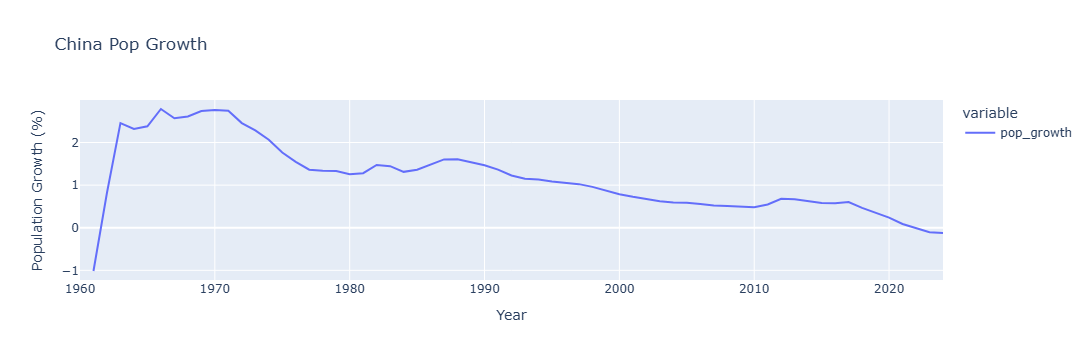

In [14]:
china_df.plot(x = "date", y = ["pop_growth"], title = "China Pop Growth",
             labels = dict(date = "Year", value = "Population Growth (%)"))

In [15]:
#automate adding reform periods to plots
def reform_plot(df, y_col, title, periods = None):

    fig = df.plot(x = "date", y = y_col, title = title)

    if periods is None:
        periods = reform_periods.keys()

    for name in periods:
        start, end = reform_periods[name]
        fig.add_vrect(
            x0 = start,
            x1 = end,
            opacity = 0.12,
            annotation_text = name,
            annotation_position = "top left")

    fig.show()

In [16]:
reform_plot(china_df, ["fertility", "pop_growth", "ag_va"], 
            "Fertility, Population Growth, and Agriculture (value-added)",
            periods = ["Great Leap Forward", "One-Child Policy", "WTO Entry"])

In [17]:
china_df[["date", "fertility"]].head()

fig = px.line(china_df, x = "date", y = "fertility",
              markers = True, title = "China Total Fertility Rate")

fig.update_layout(template = "plotly", xaxis_title = "Year",
                  yaxis_title = "Fertility Rate")

# one-child policy begins in 1979; ends in 2015

fig.add_vline(x = 1979, line_dash = "dash", annotation_text = "One-child policy")
fig.add_vline(x = 2015, line_dash = "dash", annotation_text = "Policy relaxed")

fig.add_hline(y = 2.1, line_dash = "dot", opacity = 0.3, annotation_text = "Replacement level")
fig.show()

High fertility in the pre 1970s, then collapse begins as urbanization and education effects take place plus the one-child policy. Fertility drops below replacement level around 1990. Policy relaxation did not actually reverse the decline, likely due to the structural changes common to countries rapidly developing.

What caused the massive jump in fertility in the early 1960s? Let's find out.

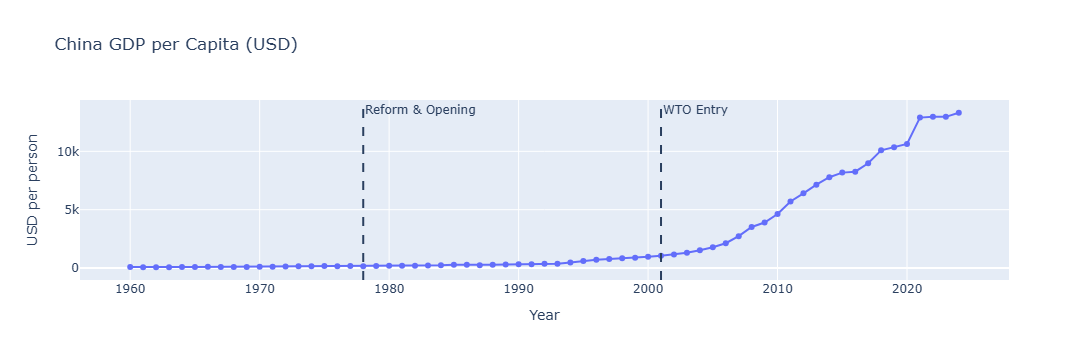

In [18]:
fig = px.line(china_df, x = "date", y = "gdp_percap",
              markers = True, title = "China GDP per Capita (USD)")
fig.update_layout(template = "plotly", xaxis_title = "Year",
                  yaxis_title = "USD per person")

fig.add_vline(x=1978, line_dash="dash", annotation_text="Reform & Opening")
fig.add_vline(x=2001, line_dash="dash", annotation_text="WTO Entry")

fig.show()

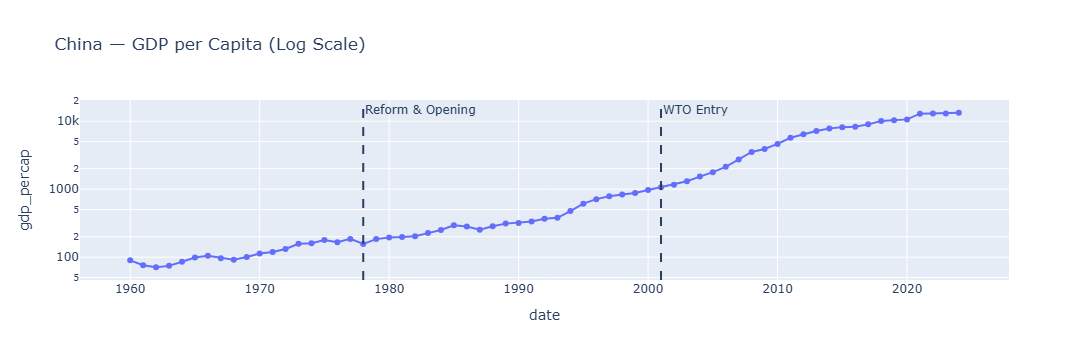

In [19]:
# log scale GDP growth to show jumps
fig_log = px.line(china_df, x = "date", y = "gdp_percap", markers = True,
                  title = "China — GDP per Capita (Log Scale)")

fig_log.update_layout(template = "plotly", yaxis_type = "log")

fig_log.add_vline(x = 1978, line_dash = "dash", annotation_text = "Reform & Opening")
fig_log.add_vline(x = 2001, line_dash = "dash", annotation_text = "WTO Entry")

fig_log.show()

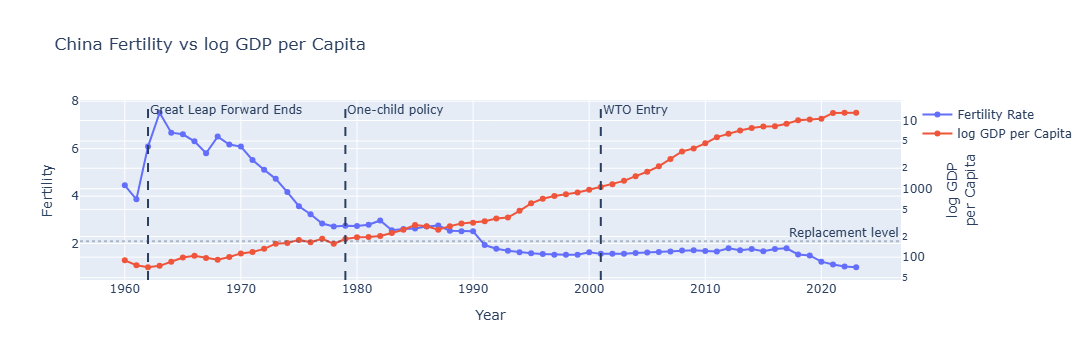

In [20]:
# fertility vs LOG gdp per cap

df = china_df.dropna(subset = ["fertility", "gdp_percap"]).copy()

import plotly.graph_objects as go
fig = go.Figure()

# fertility on left axis
fig.add_trace(go.Scatter(x = df["date"], y = df["fertility"],
                         name = "Fertility Rate", mode = "lines+markers"))
# gdp per capita on right axis
fig.add_trace(go.Scatter(x = df["date"], y = df["gdp_percap"],
                         name = "log GDP per Capita", mode = "lines+markers",
                         yaxis = "y2"))

fig.update_layout(title = "China Fertility vs log GDP per Capita",
                  xaxis_title = "Year",
                  yaxis = dict(title = "Fertility"),
                  yaxis2 = dict(title = "log GDP<br>per Capita",
                                overlaying = "y",
                                side = "right", type = "log"),
                  template = "plotly")

fig.add_vline(x = 1962, line_dash = "dash", annotation_text = "Great Leap Forward Ends")
fig.add_vline(x = 1979, line_dash = "dash", annotation_text = "One-child policy")
fig.add_vline(x = 2001, line_dash = "dash", annotation_text = "WTO Entry")
fig.add_hline(y = 2.1, line_dash = "dot", opacity = 0.3, annotation_text = "Replacement level")

fig.show()

In Lecture 1, we discussed the inverse relationship between a country's wealth and fertility. The graph above affirms what we learned about Fact 2: Women in poorer countries have higher fertility.

Falling fertility generally coincides with rising productivity and income. Notice that the economic takeoff happens most significantly after WTO entry and below replacement level fertility.
The log graph better shows the relationship b/w fertility and gdp per cap, with a more linear increase that better coincides with the decrease in fertility.

As you can see, the massive jump in fertility in 1962 coincided with the end of the the Great Leap Forward Policies and subsequently, the end of the worst effects of the Great Famine. The fertility rate rebounded after a massive crash during the famine, overshot, then stabilized around 5.5-6 before starting to drop as GDP per capita increased.

### China's GDP Per Capita Growth (Smoothed over 5-year average)

In [21]:
china_df = china_df.sort_values("date")

In [22]:
china_df["gdp_pc_growth"] = china_df["gdp_percap"].pct_change()*100
china_df["pop_growth_change"] = china_df["pop_growth"].diff()
china_df["fertility_change"] = china_df["fertility"].diff()
china_df["ag_va_change"] = china_df["ag_va"].diff()

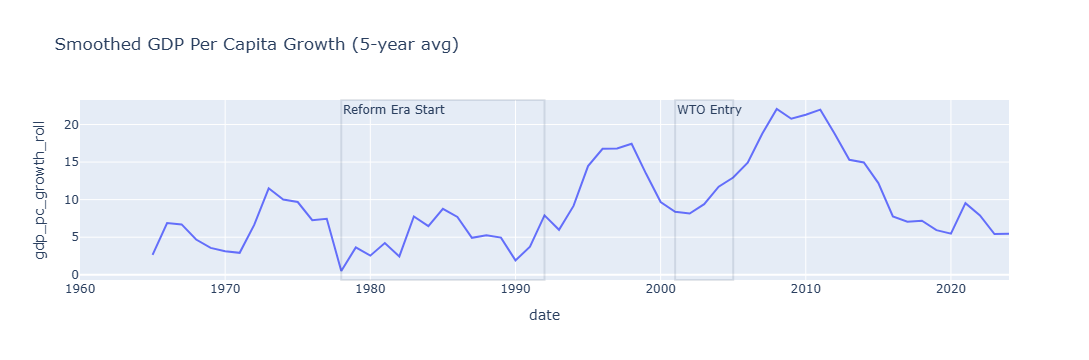

In [23]:
china_df["gdp_pc_growth_roll"] = china_df["gdp_pc_growth"].rolling(5).mean()
china_df["fertility_roll"] = china_df["fertility"].rolling(5).mean()
reform_plot(china_df, "gdp_pc_growth_roll", "Smoothed GDP Per Capita Growth (5-year avg)",
            periods = ["Reform Era Start", "WTO Entry"])

### Population Growth Rate Changes: Before, During, and After Transition Periods

In [24]:
def period_stats(df, col, start, end, window=5):

    before_mask = (df.date >= start-window) & (df.date < start)
    during_mask = (df.date >= start) & (df.date <= end)
    after_mask  = (df.date > end) & (df.date <= end+window)

    before = df.loc[before_mask, col]
    during = df.loc[during_mask, col]
    after  = df.loc[after_mask, col]

    return (before.mean(), before.count(),
            during.mean(), during.count(),
            after.mean(), after.count())

In [25]:
popgrowth = []

for name, (start, end) in reform_periods.items():
    b, bn, d, dn, a, an = period_stats(china_df, "pop_growth", start, end)

    popgrowth.append({
        "Period": name,
        "Before": b,
        "# B Obs.": bn,
        "During": d,
        "# D Obs.": dn,
        "After": a,
        "# A Obs.": an})

pd.DataFrame(popgrowth)

,Period,Before,# B Obs.,During,# D Obs.,After,# A Obs.
0,Great Leap Forward,NaN,0,-0.097536,2,2.503546,5
1,Post-Mao Transition,2.264003,5,1.416100,3,1.357345,5
2,Reform Era Start,1.805172,5,1.406013,15,1.087596,5
3,WTO Entry,0.936990,5,0.640260,5,0.514675,5
4,One-Child Policy,1.469724,5,0.981854,36,0.447750,5


Notice that during the Great Leap Forward, the population growth rate decreased as the famine increased mortality rates. We also added the number of observations the average is based on for further transparency. Recent data is more abundant.

### Population Pyramids

In [29]:
chunks = []

for chunk in pd.read_csv(
        "WPP2024_Population1JanuaryBySingleAgeSex_Medium_1950-2023.csv.gz",
        compression="gzip",
        chunksize=200000
    ):

    china_chunk = chunk[chunk["Location"].str.contains("China", na=False)]
    chunks.append(china_chunk)

pop_age = pd.concat(chunks)

/tmp/ipykernel_72/1801361086.py:3: DtypeWarning:

Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_72/1801361086.py:3: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_72/1801361086.py:3: DtypeWarning:

Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.



In [30]:
# filter out projection variants
china = pop_age[(pop_age["ISO3_code"] == "CHN") &
                (pop_age["Variant"] == "Medium")].copy()

In [31]:
# choosing years based on reforms
years = [1960, 1980, 2000, 2020]
china = china[china["Time"].isin(years)]

In [32]:
# need to make male/female long format for pop pyramid
pyr = china[["Time", "AgeGrp", "PopMale", "PopFemale"]].copy()

pyr = pyr.rename(columns = {"Time": "year",
                            "AgeGrp": "age_group"})

pyr_long = pyr.melt(id_vars = ["year", "age_group"],
                    value_vars = ["PopMale", "PopFemale"],
                    var_name = "sex",
                    value_name = "pop")

pyr_long["sex"] = pyr_long["sex"].str.replace("Pop", "")

In [33]:
# male values negative for left side
pyr_long["pop_plot"] = pyr_long["pop"]
pyr_long.loc[pyr_long["sex"] == "Male", "pop_plot"] *= -1

In [34]:
import plotly.express as px

def plot_pyramid(year):
    d = pyr_long[pyr_long["year"] == year]

    fig = px.bar(d, x = "pop_plot", y = "age_group", color = "sex",
                    orientation = "h",
                    title = f"China Population Pyramid - {year}",
                    hover_data = ["pop"])

    fig.update_layout(
        template = "plotly",
        xaxis_title = "Population",
        yaxis_title = "Age Group",
        barmode = "overlay")
    fig.show()

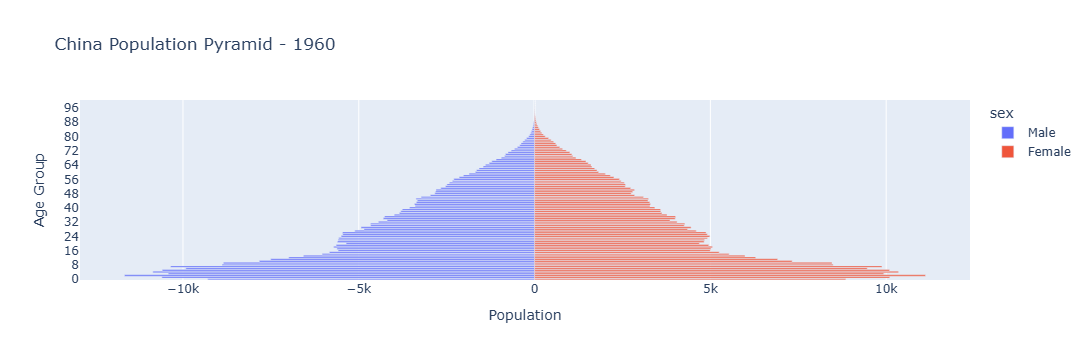

In [35]:
plot_pyramid(1960)
# wide at the base shows very high fertility
# this is pre-reform demographics

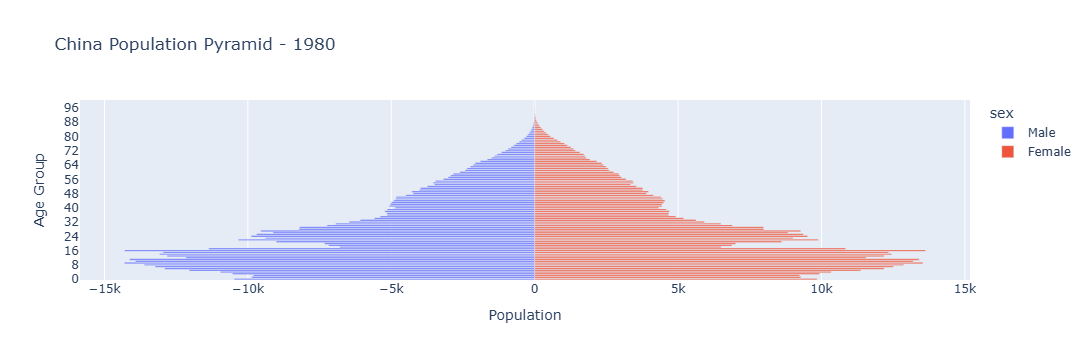

In [36]:
plot_pyramid(1980)
# one child policy starts -> base gets narrower and bulge moves up
# shows fertility is decreasing

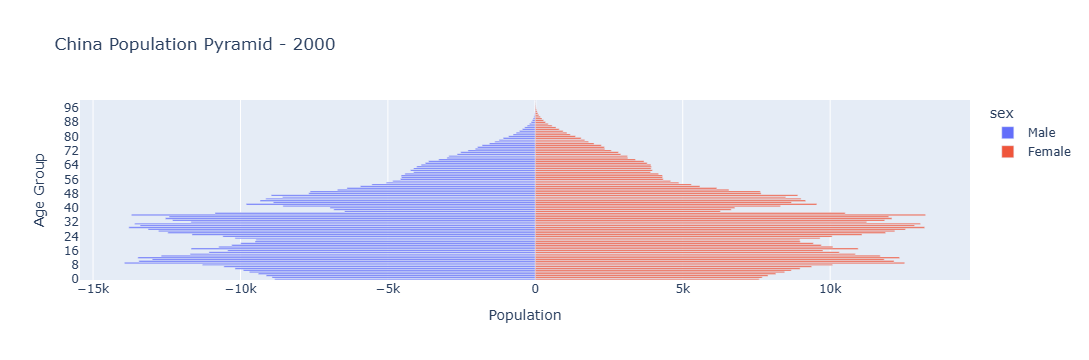

In [37]:
plot_pyramid(2000)
# bulge now at the working age shows increasing lower fertility
# reform period; one child policy in full effect

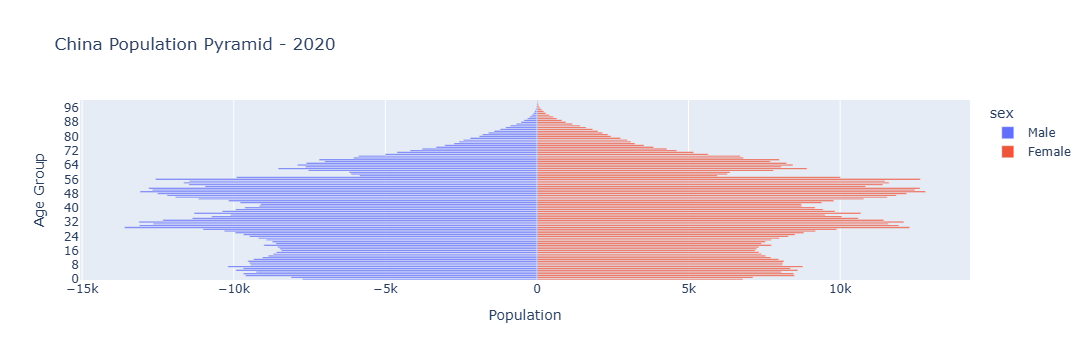

In [38]:
plot_pyramid(2020)
# population starts aging out as fertility rate stays below 2
# dependency of older population on younger population

## Sectoral Changes

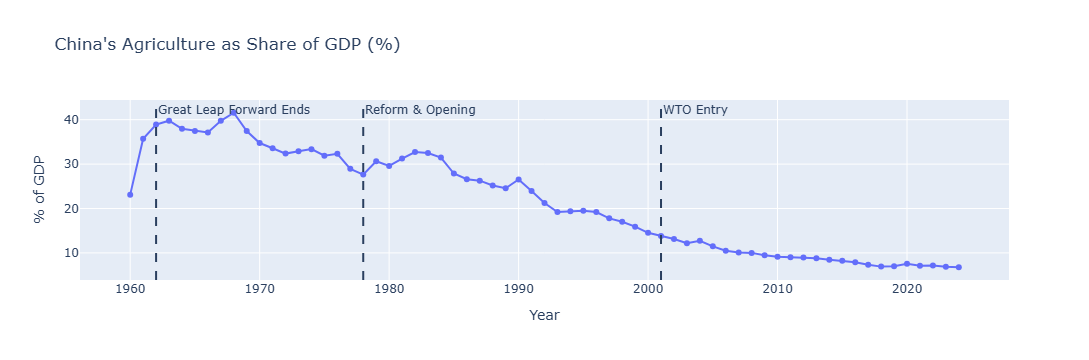

In [39]:
fig = px.line(china_df, x = "date", y = "ag_va",
              title = "China's Agriculture as Share of GDP (%)",
              markers = True)

fig.update_layout(
    template = "plotly",
    xaxis_title = "Year",
    yaxis_title = "% of GDP")

fig.add_vline(x = 1962, line_dash = "dash", annotation_text = "Great Leap Forward Ends")
fig.add_vline(x = 1978, line_dash = "dash", annotation_text = "Reform & Opening")
fig.add_vline(x = 2001, line_dash = "dash", annotation_text = "WTO Entry")

fig.show()

In [40]:
# urbanization and rural -> urban migration
indicators["SP.URB.TOTL.IN.ZS"] = "urban_pct"

china_df = get_wb_data(indicators, country_code, start_year, end_year)
china_df = china_df.sort_values("date")

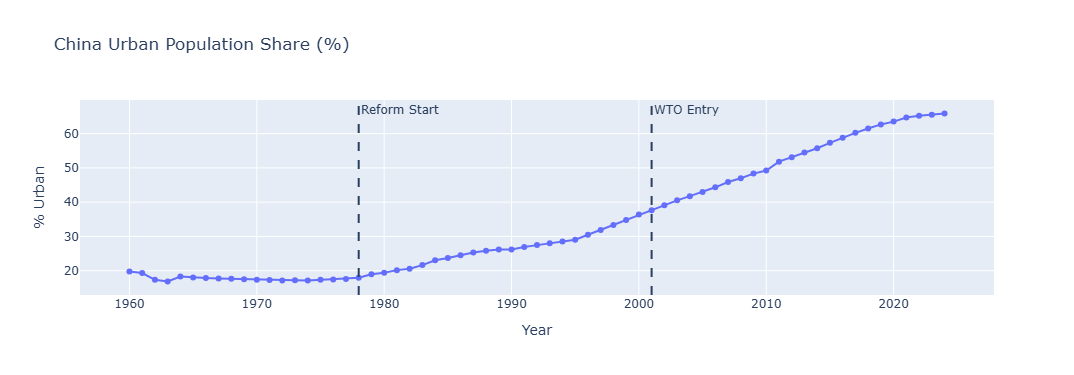

In [41]:
fig = px.line(china_df, x = "date", y = "urban_pct", markers = True,
              title = "China Urban Population Share (%)")
fig.update_layout(template = "plotly", xaxis_title = "Year",
                  yaxis_title = "% Urban")
fig.add_vline(x=1978, line_dash="dash", annotation_text="Reform Start")
fig.add_vline(x=2001, line_dash="dash", annotation_text="WTO Entry")

fig.show()

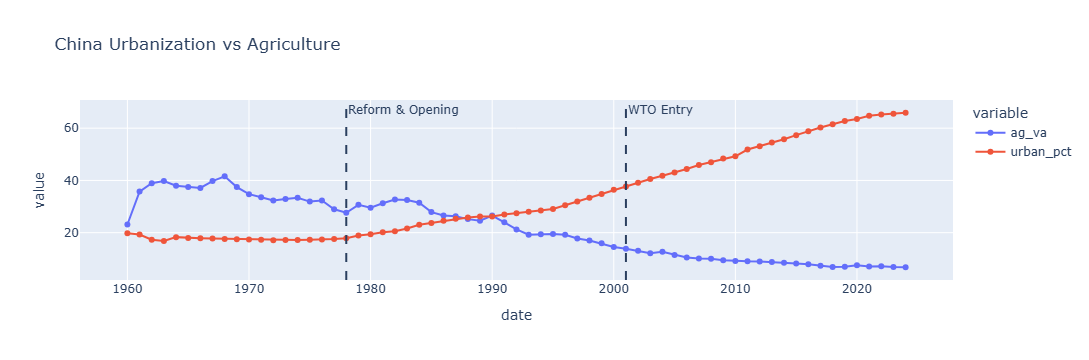

In [42]:
fig = px.line(china_df, x = "date", y = ["ag_va", "urban_pct"], markers = True,
        title = "China Urbanization vs Agriculture")
fig.add_vline(x = 1978, line_dash = "dash", annotation_text = "Reform & Opening")
fig.add_vline(x = 2001, line_dash = "dash", annotation_text = "WTO Entry")

fig.show()

As the economy shifted away from the agrarian policies forced during the Great Leap Forward, agriculture value-added decreased while urbanization increased. This changing relationship coincides with the drop in fertility and rise in GDP per capita that we saw previously.

### Unit Testing

In [43]:
# years ordered correctly
assert china_df["date"].is_monotonic_increasing, "Years are not sorted"

# population numbers make sense
assert (china_df["pop"] >= 0).all(), "Negative population found"
assert (china_df["pop"] > 0).all(), "Zero population found"

# pop pyramid gender checks
assert (china["PopMale"] >= 0).all(), "Negative male population found"
assert (china["PopFemale"] >= 0).all(), "Negative female population found"
assert (china["PopTotal"] >= 0).all(), "Negative total population found"

# total male + female check
diff = china["PopMale"] + china["PopFemale"] - china["PopTotal"]
assert (diff.abs() < 1e-6).all(), "Male + Female ≠ Total"

# gdp check
assert (china_df["gdp_percap"] > 0).all(), "Bad GDP per capita values"

### Population Dataframe Function

In [44]:
def get_un_age_sex_df_chunked(file_path):

    pieces = []

    for chunk in pd.read_csv(
        file_path,
        compression="gzip",
        chunksize=200_000
    ):
        chunk = chunk[chunk["LocTypeName"] == "Country/Area"]

        chunk["M_col"] = "M_" + chunk["AgeGrp"].astype(str)
        chunk["F_col"] = "F_" + chunk["AgeGrp"].astype(str)

        male = chunk.pivot_table(
            index=["Location","Time"],
            columns="M_col",
            values="PopMale",
            aggfunc="sum"
        )

        female = chunk.pivot_table(
            index=["Location","Time"],
            columns="F_col",
            values="PopFemale",
            aggfunc="sum"
        )

        pieces.append(male.join(female))

    df = (
        pd.concat(pieces)
        .groupby(level=[0,1]).sum()
        .sort_index(axis=1)
    )

    df.index.names = ["Country","Year"]

    return df

age_sex_df = get_un_age_sex_df_chunked("WPP2024_Population1JanuaryBySingleAgeSex_Medium_1950-2023.csv.gz")

/tmp/ipykernel_72/3021631771.py:5: DtypeWarning:

Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_72/3021631771.py:5: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_72/3021631771.py:5: DtypeWarning:

Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.



In [46]:
def get_age_sex(age_sex_df, country=None, year=None):

    if country and year:
        return age_sex_df.loc[[(country, year)]]
    if country:
        return age_sex_df.loc[country]
    if year:
        return age_sex_df.xs(year, level="Year")
    return age_sex_df

get_age_sex(age_sex_df, "China", 2000)

,,F_0,F_1,F_10,F_100+,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_2,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_3,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_4,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,F_5,F_50,F_51,F_52,F_53,F_54,F_55,F_56,F_57,F_58,F_59,F_6,F_60,F_61,F_62,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_7,F_70,F_71,F_72,F_73,F_74,F_75,F_76,F_77,F_78,F_79,F_8,F_80,F_81,F_82,F_83,F_84,F_85,F_86,F_87,F_88,F_89,F_9,F_90,F_91,F_92,F_93,F_94,F_95,F_96,F_97,F_98,F_99,M_0,M_1,M_10,M_100+,M_11,M_12,M_13,M_14,M_15,M_16,M_17,M_18,M_19,M_2,M_20,M_21,M_22,M_23,M_24,M_25,M_26,M_27,M_28,M_29,M_3,M_30,M_31,M_32,M_33,M_34,M_35,M_36,M_37,M_38,M_39,M_4,M_40,M_41,M_42,M_43,M_44,M_45,M_46,M_47,M_48,M_49,M_5,M_50,M_51,M_52,M_53,M_54,M_55,M_56,M_57,M_58,M_59,M_6,M_60,M_61,M_62,M_63,M_64,M_65,M_66,M_67,M_68,M_69,M_7,M_70,M_71,M_72,M_73,M_74,M_75,M_76,M_77,M_78,M_79,M_8,M_80,M_81,M_82,M_83,M_84,M_85,M_86,M_87,M_88,M_89,M_9,M_90,M_91,M_92,M_93,M_94,M_95,M_96,M_97,M_98,M_99
Country,Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,2000,7592.615,7695.4,12167.458,4.166,11832.282,12354.546,11696.533,10853.5,10309.363,9755.854,10948.748,10091.338,9697.588,7892.305,9428.925,8985.331,8970.949,9657.701,10066.4,11079.062,11879.045,12192.453,12552.668,13204.539,8156.898,12864.393,13062.298,11238.531,11850.699,12094.762,11986.798,13233.663,10509.091,6276.511,6643.026,8454.855,6765.251,8314.269,9546.879,8688.937,9167.363,9013.268,8492.626,8902.678,7657.607,7632.892,8680.341,6566.012,6154.508,5582.892,5293.062,4867.483,4589.827,4337.048,4316.234,4312.271,4179.008,8981.142,3908.156,3972.028,3927.741,3934.486,3918.83,3792.292,3687.43,3396.569,3135.784,3124.037,9373.083,2899.357,2818.352,2577.444,2354.705,2341.005,2236.893,1991.851,1805.474,1676.189,1553.123,10082.277,1361.631,1187.186,1070.143,942.186,809.92,701.084,568.759,436.447,345.978,283.159,12525.511,227.46,168.621,119.337,86.781,59.743,38.808,24.871,14.596,8.36,4.456,8839.473,8932.021,13445.778,0.049,12993.054,13480.617,12686.1,11708.117,11068.848,10434.874,11674.758,10734.556,10295.393,9128.357,9992.089,9507.054,9477.086,10187.108,10599.131,11645.258,12462.894,12778.504,13134.053,13786.259,9396.091,13404.783,13588.451,11680.604,12303.536,12546.25,12421.538,13696.684,10864.208,6470.246,6835.044,9696.521,6965.486,8560.904,9805.454,8887.573,9336.799,9141.774,8574.582,8958.378,7684.589,7639.146,9903.854,6709.505,6388.81,5934.186,5544.951,5055.543,4834.375,4574.556,4542.399,4550.303,4423.326,10187.23,4127.285,4235.564,4131.189,4022.012,3870.375,3730.781,3621.156,3276.21,2997.666,2932.118,10563.411,2652.433,2530.855,2285.177,2035.772,1957.517,1805.45,1557.203,1372.874,1230.267,1089.139,11292.502,907.965,754.725,649.268,538.087,441.34,362.637,275.924,197.093,142.691,103.883,13933.66,73.321,47.5,29.483,18.103,10.457,5.68,2.942,1.33,0.544,0.181
